In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [2]:
os.getcwd()

'C:\\Projects\\Projects\\quotes_generator_twitter'

In [3]:
os.listdir(os.getcwd() + "\\data")

['quotes.json', 'quotes.json.zip', 'quotes_all.csv']

In [4]:
df = pd.read_csv(".\data\quotes_all.csv", delimiter=";", header=None, names=["quote", "author", "topic"])

In [5]:
df.head()

,quote,author,topic
0,Age is an issue of mind over matter. If you do...,Mark Twain,age
1,"Anyone who stops learning is old, whether at t...",Henry Ford,age
2,Wrinkles should merely indicate where smiles h...,Mark Twain,age
3,True terror is to wake up one morning and disc...,Kurt Vonnegut,age
4,A diplomat is a man who always remembers a wom...,Robert Frost,age


In [6]:
df.shape

(75966, 3)

In [7]:
df.groupby(["author"]).count()["quote"].sort_values(ascending=False)

author
Henry David Thoreau             203
Mitt Romney                     198
Ralph Waldo Emerson             193
Friedrich Nietzsche             169
Mahatma Gandhi                  167
George Bernard Shaw             163
Albert Einstein                 161
Thomas Jefferson                159
Jerry Saltz                     151
Plato                           149
Aristotle                       145
Barack Obama                    143
Oscar Wilde                     140
Benjamin Franklin               139
John F. Kennedy                 131
Francois de La Rochefoucauld    129
Mark Twain                      128
Johann Wolfgang von Goethe      124
Voltaire                        122
Bertrand Russell                121
William Shakespeare             119
Benjamin Disraeli               119
Hillary Clinton                 117
Victor Hugo                     117
Lucius Annaeus Seneca           116
Steve Jobs                      116
Winston Churchill               115
Marcus Tullius Cicero

In [8]:
df.topic.unique()

array(['age', 'alone', 'amazing', 'anger', 'anniversary', 'architecture',
       'art', 'attitude', 'beauty', 'best', 'birthday', 'business', 'car',
       'change', 'communication', 'computers', 'cool', 'courage', 'dad',
       'dating', 'death', 'design', 'diet', 'dreams', 'education',
       'environmental', 'equality', 'experience', 'failure', 'faith',
       'family', 'famous', 'fear', 'finance', 'fitness', 'food',
       'forgiveness', 'freedom', 'friendship', 'funny', 'future',
       'gardening', 'god', 'good', 'government', 'graduation', 'great',
       'happiness', 'health', 'history', 'home', 'hope', 'humor',
       'imagination', 'inspirational', 'intelligence', 'jealousy',
       'knowledge', 'leadership', 'learning', 'legal', 'life', 'love',
       'marriage', 'medical', 'men', 'mom', 'money', 'morning',
       'motivational', 'movies', 'movingon', 'music', 'nature',
       'parenting', 'patience', 'patriotism', 'peace', 'pet', 'poetry',
       'politics', 'positive', 'po

In [9]:
df.groupby("topic").count().sort_values(by="quote", ascending=False)

,quote,author
topic,,
dad,1000,1000
religion,1000,1000
death,1000,1000
money,1000,1000
home,1000,1000
movies,1000,1000
history,1000,1000
nature,1000,1000
politics,1000,1000


### lets see a random quote from the topic valentinesday since it was a couple of days ago:

In [10]:
df[df.topic == "valentinesday"].quote.iloc[np.random.randint(0,40)]

'True love comes quietly, without banners or flashing lights. If you hear bells, get your ears checked.'

#### Some random quotes from the top25 topics

In [11]:
top_topics = df.groupby("topic").count().sort_values(by="quote", ascending=False).index[:25]
for topic in top_topics:
    print("Random quote for topic {}".format(topic))
    print(df[df.topic == topic].quote.iloc[np.random.randint(0,1000)])
    print()

Random quote for topic dad
I started off playing the clarinet, after I was inspired by listening to my dad's Benny Goodman records.

Random quote for topic religion
Every formula of every religion has in this age of reason, to submit to the acid test of reason and universal assent.

Random quote for topic death
I think that much of this was running in background as I contemplated whether or not to attend the PS 99 reunion, although I certainly anticipated that I would not it smelled like death, not youth.

Random quote for topic money
New York City is a great monument to the power of money and greed... a race for rent.

Random quote for topic home
Every woman I've had a relationship with has found this maddening the fact that I will talk about anything on the stage, and reveal all this stuff, and yet when I'm at home, I clam up and won't discuss anything intimate or personal.

Random quote for topic movies
To be honest, I don't enjoy watching movies much when I'm working. They tend to 

In [12]:
top_author = df.groupby("author").count().sort_values(by="quote", ascending=False).index[:10]
for author in top_author:
    print("Random quote for author {}".format(author))
    print(df[df.author == author].quote.iloc[np.random.randint(0,100)])
    print()

Random quote for author Henry David Thoreau
Not only must we be good, but we must also be good for something.

Random quote for author Mitt Romney
Our worldly successes cannot be guaranteed, but our ability to achieve spiritual success is entirely up to us, thanks to the grace of God. The best advice I know is to give is to give those worldly things your best but never your all - reserve the ultimate hope for the only one who can grant it.

Random quote for author Ralph Waldo Emerson
With the past, I have nothing to do nor with the future. I live now.

Random quote for author Friedrich Nietzsche
The man of knowledge must be able not only to love his enemies but also to hate his friends.

Random quote for author Mahatma Gandhi
Fear has its use but cowardice has none.

Random quote for author George Bernard Shaw
The single biggest problem in communication is the illusion that it has taken place.

Random quote for author Albert Einstein
I do not believe in the God of theology who rewards 

### Short analyze of the length of the quotes

In [13]:
df['length'] = df['quote'].apply(lambda x: len(x))
df['words'] = df['quote'].apply(lambda x: len(x.split()))

In [14]:
df.head()

,quote,author,topic,length,words
0,Age is an issue of mind over matter. If you do...,Mark Twain,age,74,15
1,"Anyone who stops learning is old, whether at t...",Henry Ford,age,156,28
2,Wrinkles should merely indicate where smiles h...,Mark Twain,age,55,8
3,True terror is to wake up one morning and disc...,Kurt Vonnegut,age,102,19
4,A diplomat is a man who always remembers a wom...,Robert Frost,age,88,16


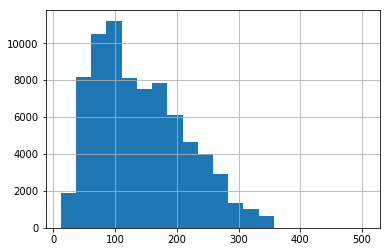

In [15]:
df.length.hist(bins=20)

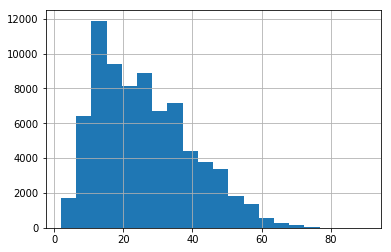

In [16]:
df.words.hist(bins=20)

In [17]:
top_author

Index(['Henry David Thoreau', 'Mitt Romney', 'Ralph Waldo Emerson',
       'Friedrich Nietzsche', 'Mahatma Gandhi', 'George Bernard Shaw',
       'Albert Einstein', 'Thomas Jefferson', 'Jerry Saltz', 'Plato'],
      dtype='object', name='author')

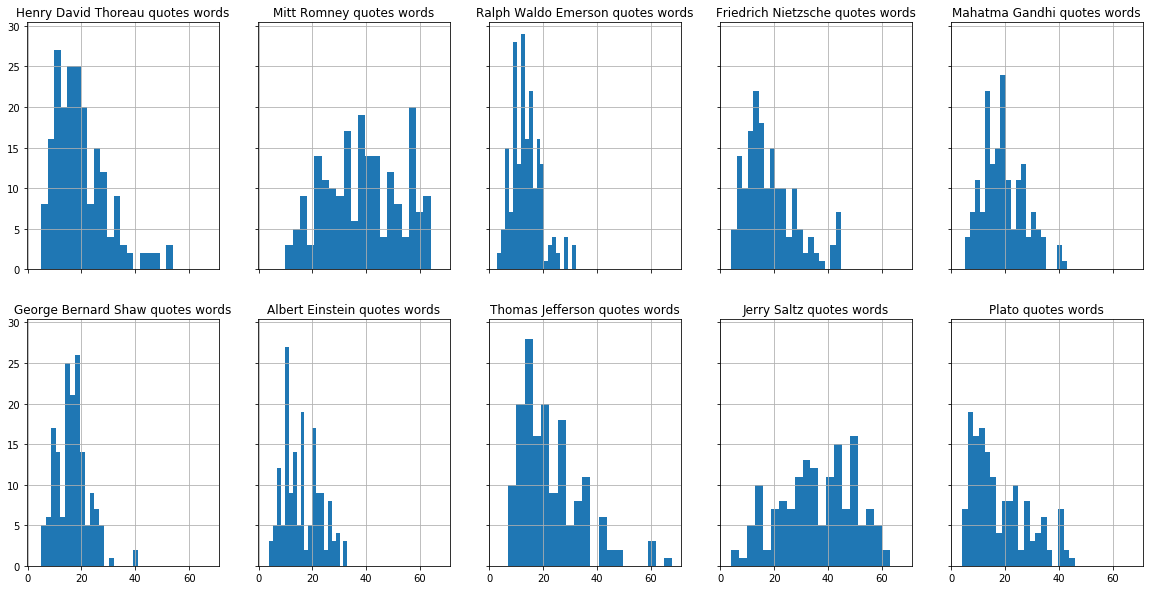

In [18]:
fig, axs = plt.subplots(2,5, figsize=(20,10), sharex=True, sharey=True)

for i, author in enumerate(top_author):
    df[df.author == author].words.hist(ax=axs[i//5,i%5], bins=20)
    axs[i//5,i%5].set_title("{} quotes words".format(author))


In [19]:
top_topics

Index(['dad', 'religion', 'death', 'money', 'home', 'movies', 'history',
       'nature', 'politics', 'business', 'science', 'art', 'fear', 'truth',
       'war', 'government', 'family', 'alone', 'faith', 'health', 'happiness',
       'experience', 'hope', 'work', 'funny'],
      dtype='object', name='topic')

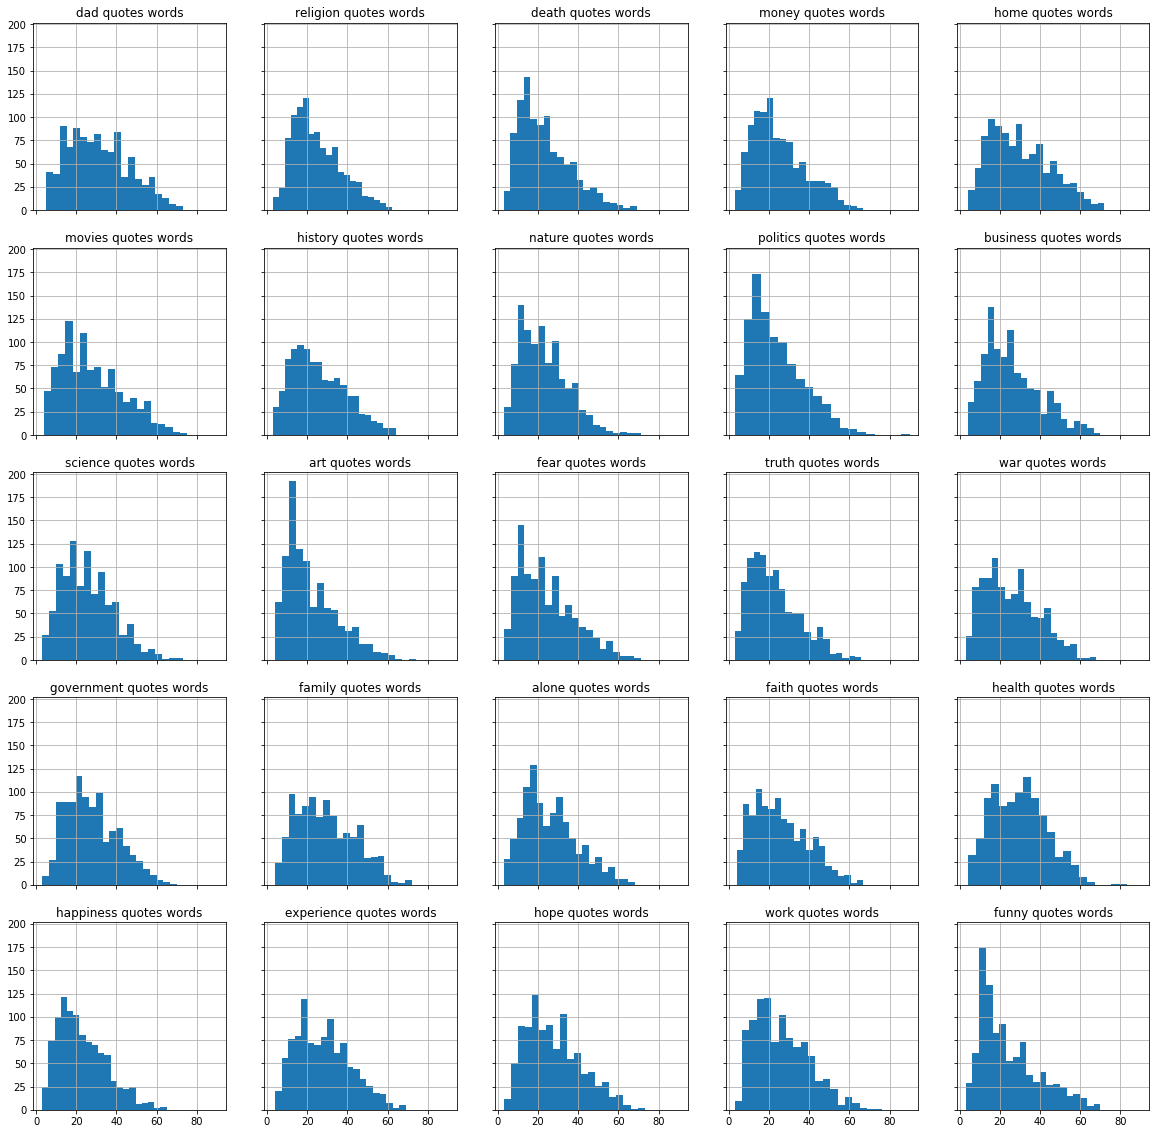

In [20]:
fig, axs = plt.subplots(5,5, figsize=(20,20), sharex=True, sharey=True)

for i, topic in enumerate(top_topics):
    df[df.topic == topic].words.hist(ax=axs[i//5,i%5], bins=20)
    axs[i//5,i%5].set_title("{} quotes words".format(topic))

Not very interesting results, the distribuitions seem to be pretty identical or with not significant differences

### Lets generate some Wordclouds for topics

In [21]:
top_topics

Index(['dad', 'religion', 'death', 'money', 'home', 'movies', 'history',
       'nature', 'politics', 'business', 'science', 'art', 'fear', 'truth',
       'war', 'government', 'family', 'alone', 'faith', 'health', 'happiness',
       'experience', 'hope', 'work', 'funny'],
      dtype='object', name='topic')

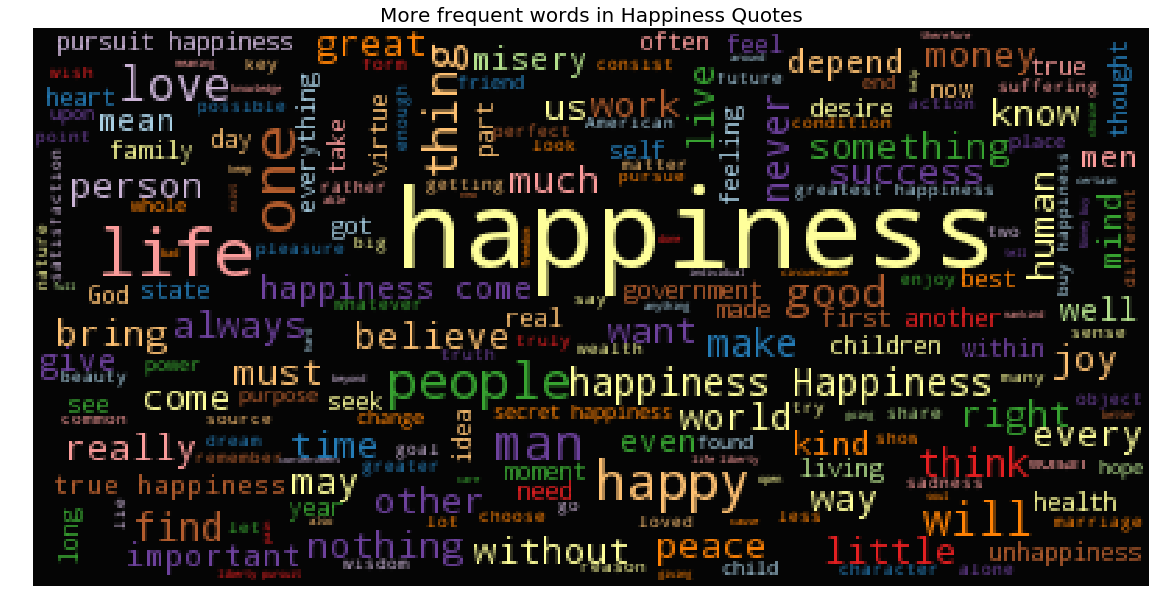

In [22]:
happiness_wc = df.quote[df.topic == "happiness"]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=200, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(happiness_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Happiness Quotes", fontsize=20);

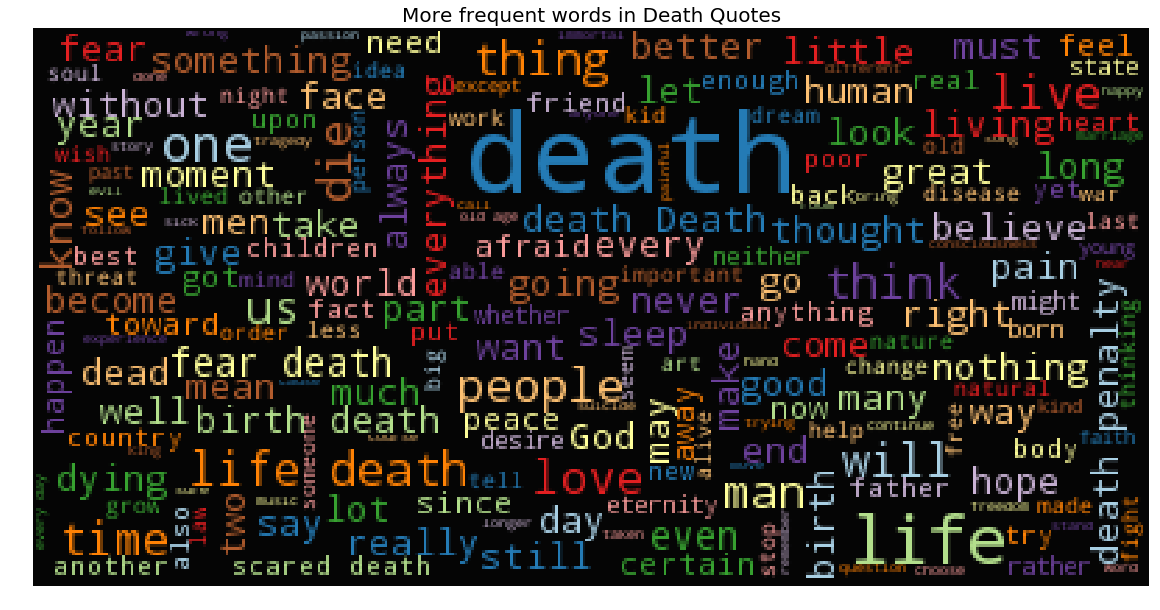

In [23]:
death_wc = df.quote[df.topic == "death"]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=200, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(death_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Death Quotes", fontsize=20);

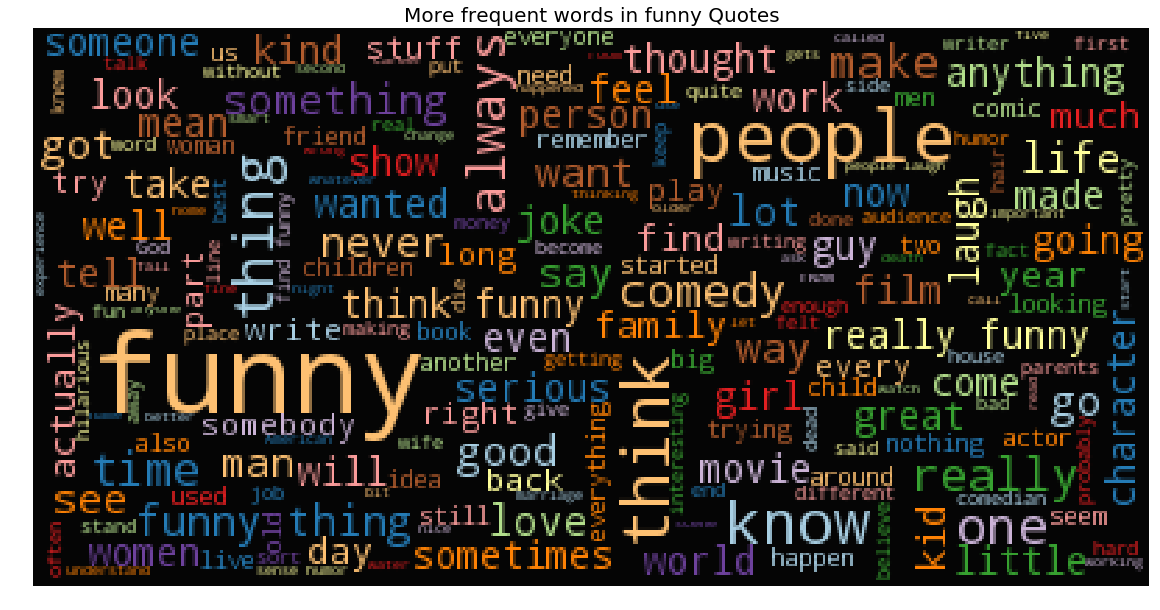

In [24]:
funny_wc = df.quote[df.topic == "funny"]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=200, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(funny_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in funny Quotes", fontsize=20);

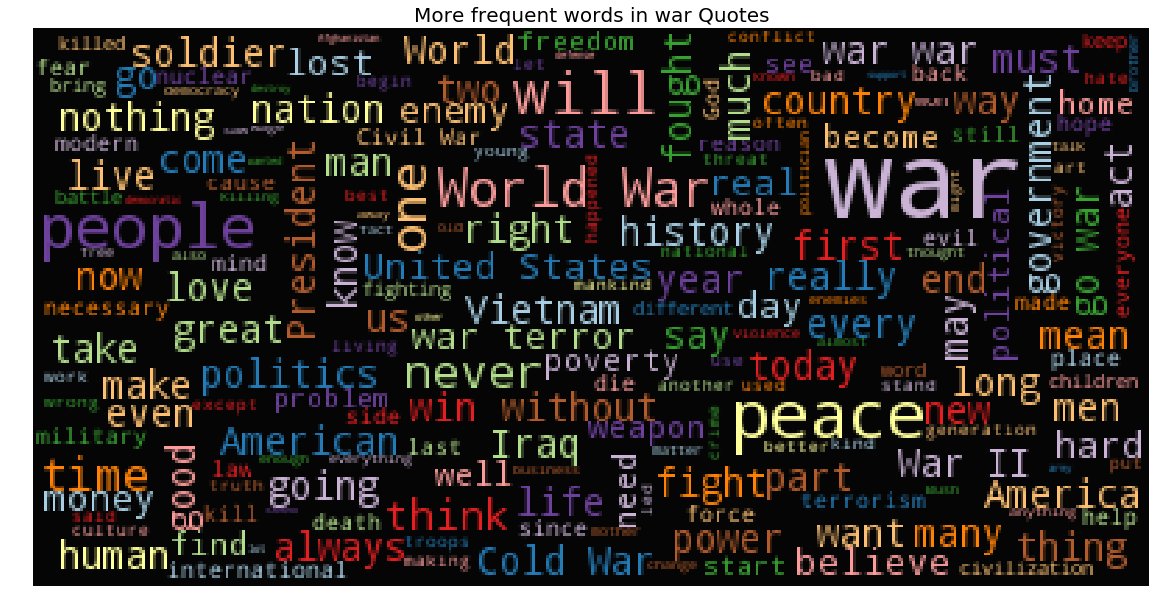

In [25]:
war_wc = df.quote[df.topic == "war"]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=200, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(war_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in war Quotes", fontsize=20);

### And for some Authors

In [26]:
top_author

Index(['Henry David Thoreau', 'Mitt Romney', 'Ralph Waldo Emerson',
       'Friedrich Nietzsche', 'Mahatma Gandhi', 'George Bernard Shaw',
       'Albert Einstein', 'Thomas Jefferson', 'Jerry Saltz', 'Plato'],
      dtype='object', name='author')

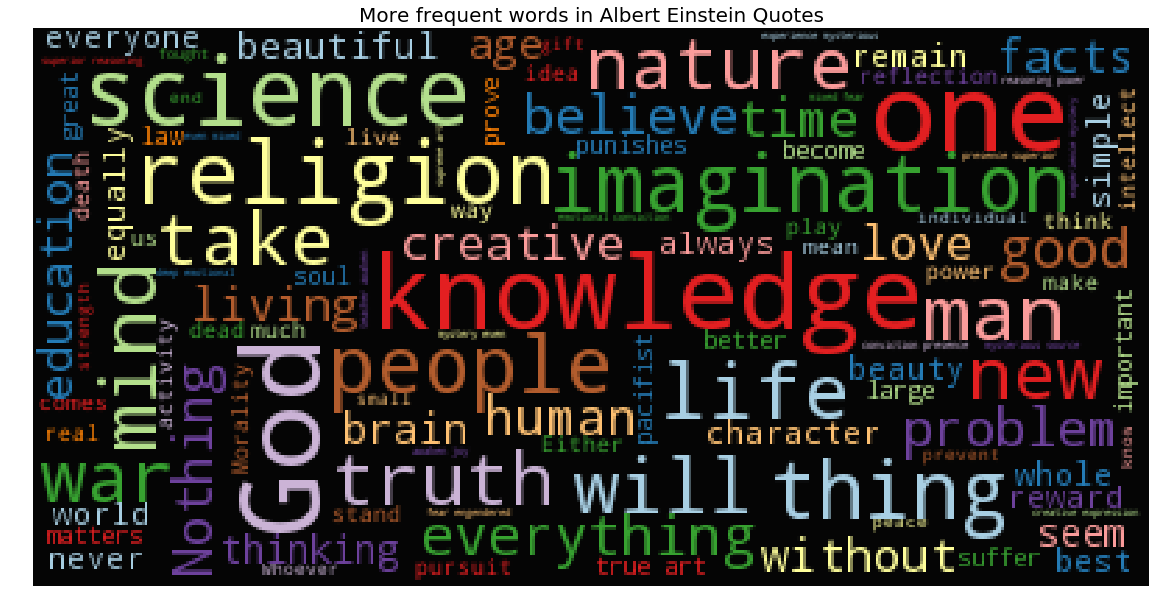

In [27]:
Einstein_wc = df.quote[df.author == "Albert Einstein"]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=200, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(Einstein_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Albert Einstein Quotes", fontsize=20);

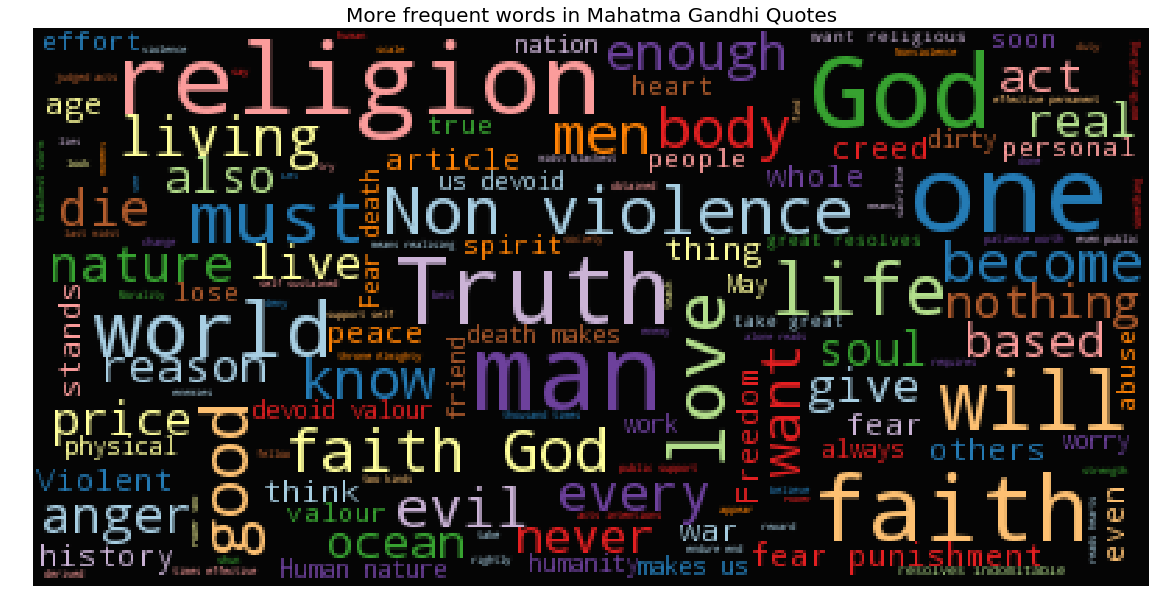

In [28]:
Einstein_wc = df.quote[df.author == "Mahatma Gandhi"]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=200, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(Einstein_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Mahatma Gandhi Quotes", fontsize=20);

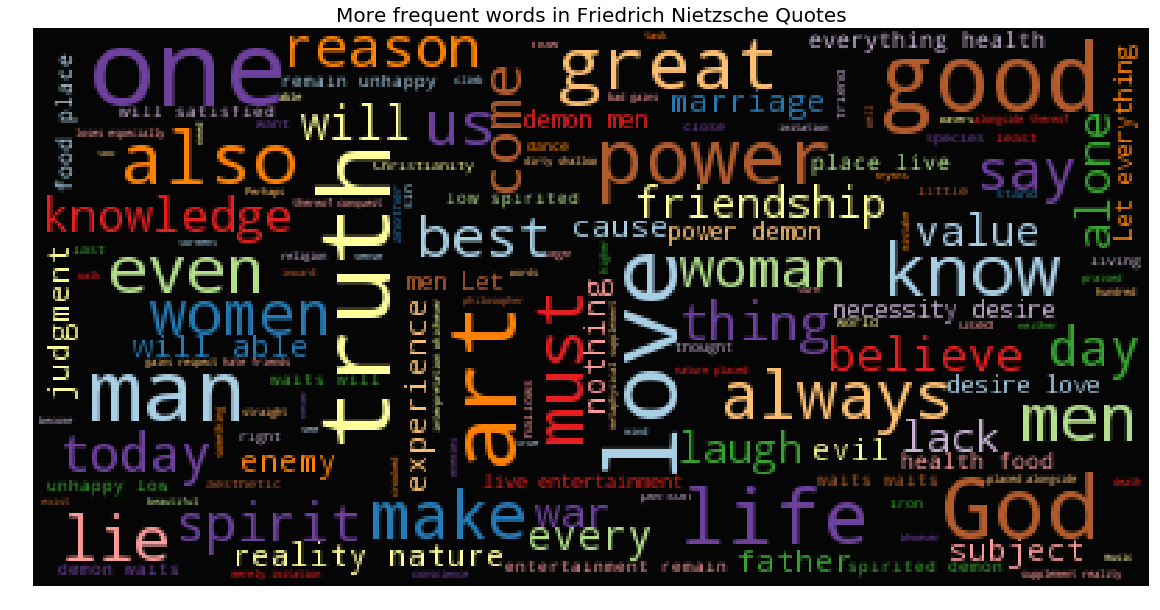

In [29]:
Einstein_wc = df.quote[df.author == "Friedrich Nietzsche"]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=200, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(Einstein_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Friedrich Nietzsche Quotes", fontsize=20);

### The data seems to be pretty clean and there isn't much to change, but we can look at the number of unique words used by each author

In [30]:
def unique_words_author(data_df, author):
#     unique words:
    words_set = set()
    data_df[data_df["author"] == author]["quote"].str.lower().str.split().apply(words_set.update)
#     totals
    total_words = data_df[data_df.author == author]["quote"].str.lower().str.split().apply(lambda x:len(x)).sum()
    
    return len(words_set), total_words
    

In [31]:
unique_words_author(df, 'Mark Twain')

(609, 1956)

In [87]:
len(df.author.unique())

11174

#### checking this for more that 10k authors is too much, lets do it only for some, wil check only for authors with more than 50 quotes

In [45]:
top_authors_df = df.groupby("author").count().sort_values(by="quote", ascending=False).reset_index()[["author", "quote"]]

In [47]:
authors = top_authors_df[top_authors_df.quote > 50].author

In [50]:
unique = []
total = []
author_list = []

for author in authors:
    print("checking for author {}".format(author))
    unique1, total1 = unique_words_author(df, author)
    unique.append(unique1)
    total.append(total1)
    author_list.append(author)

checking for author Henry David Thoreau
checking for author Mitt Romney
checking for author Ralph Waldo Emerson
checking for author Friedrich Nietzsche
checking for author Mahatma Gandhi
checking for author George Bernard Shaw
checking for author Albert Einstein
checking for author Thomas Jefferson
checking for author Jerry Saltz
checking for author Plato
checking for author Aristotle
checking for author Barack Obama
checking for author Oscar Wilde
checking for author Benjamin Franklin
checking for author John F. Kennedy
checking for author Francois de La Rochefoucauld
checking for author Mark Twain
checking for author Johann Wolfgang von Goethe
checking for author Voltaire
checking for author Bertrand Russell
checking for author William Shakespeare
checking for author Benjamin Disraeli
checking for author Victor Hugo
checking for author Hillary Clinton
checking for author Steve Jobs
checking for author Lucius Annaeus Seneca
checking for author Winston Churchill
checking for author Mar

In [60]:
data = {"author":author_list, 'unique':unique, 'total':total}
df_words = pd.DataFrame(data)

In [63]:
df_words["unique_%"] = df_words.apply(lambda row: row["unique"] / row["total"] * 100, axis=1)

In [64]:
df_words.head()

,author,total,unique,unique_%
0,Henry David Thoreau,3977,945,23.761629
1,Mitt Romney,7672,1285,16.749218
2,Ralph Waldo Emerson,2670,725,27.153558
3,Friedrich Nietzsche,3176,814,25.629723
4,Mahatma Gandhi,3239,797,24.606360


In [66]:
df_words.sort_values(by="unique_%", ascending=False)

,author,total,unique,unique_%
112,Thomas Fuller,657,315,47.945205
109,Sophocles,714,327,45.798319
55,Mason Cooley,870,387,44.482759
102,Doug Coupland,1156,477,41.262976
136,Oliver Wendell Holmes,975,399,40.923077
129,Woody Allen,769,311,40.442133
90,Brian Eno,1483,590,39.784221
88,Alexander Pope,1003,392,39.082752
37,Ambrose Bierce,1757,681,38.759249
120,Josh Billings,929,358,38.536060


#### kind of interesting, looks like politicians are a bit repetitive in what they say, they have very low percentage or unique words. If that doesnt surprise me much, politicians like to repeat the same message, the fact that we also see name like Aristotle and Buddha with low number of unique words was a surprise   

#### we also need to take in consideration that its easier to have a good % of unique words if your total of words is relatively low, thats what happens in the top of the table, still over 40% unique words is impressive

## Are there repeated quotes?

In [67]:
len(df.quote.unique())

61071

In [68]:
df.shape

(75966, 5)

### bad news, looks like there were lots of repeated quotes, need to analyse further

In [78]:
df2 = df[["quote", "author", "topic"]]

In [88]:
df2.groupby("quote").count().sort_values(by="topic", ascending=False)

,author,topic
quote,,
I believe that imagination is stronger than knowledge. That myth is more potent than history. That dreams are more powerful than facts. That hope always triumphs over experience. That laughter is the only cure for grief. And I believe that love is stronger than death.,8,8
"To enjoy good health, to bring true happiness to one's family, to bring peace to all, one must first discipline and control one's own mind. If a man can control his mind he can find the way to Enlightenment, and all wisdom and virtue will naturally come to him.",7,7
"Learn to enjoy every minute of your life. Be happy now. Don't wait for something outside of yourself to make you happy in the future. Think how really precious is the time you have to spend, whether it's at work or with your family. Every minute should be enjoyed and savored.",6,6
"The science of politics is the one science that is deposited by the streams of history, like the grains of gold in the sand of a river and the knowledge of the past, the record of truths revealed by experience, is eminently practical, as an instrument of action and a power that goes to making the future.",6,6
"I am just absolutely convinced that the best formula for giving us peace and preserving the American way of life is freedom, limited government, and minding our own business overseas.",6,6
"Like success, failure is many things to many people. With Positive Mental Attitude, failure is a learning experience, a rung on the ladder, a plateau at which to get your thoughts in order and prepare to try again.",6,6
"I look forward to a great future for America - a future in which our country will match its military strength with our moral restraint, its wealth with our wisdom, its power with our purpose.",6,6
"All successful people men and women are big dreamers. They imagine what their future could be, ideal in every respect, and then they work every day toward their distant vision, that goal or purpose.",6,6
"A good teacher can inspire hope, ignite the imagination, and instill a love of learning.",6,6


In [90]:
df2[df2["quote"] == "I believe that imagination is stronger than knowledge. That myth is more potent than history. That dreams are more powerful than facts. That hope always triumphs over experience. That laughter is the only cure for grief. And I believe that love is stronger than death."]

,quote,author,topic
13399,I believe that imagination is stronger than kn...,Robert Fulghum,death
15095,I believe that imagination is stronger than kn...,Robert Fulghum,dreams
17399,I believe that imagination is stronger than kn...,Robert Fulghum,experience
33996,I believe that imagination is stronger than kn...,Robert Fulghum,history
35929,I believe that imagination is stronger than kn...,Robert Fulghum,hope
37437,I believe that imagination is stronger than kn...,Robert Fulghum,imagination
39087,I believe that imagination is stronger than kn...,Robert Fulghum,knowledge
43317,I believe that imagination is stronger than kn...,Robert Fulghum,love


### So looks like the quotes with more than one topic are repeated, there is a better way to represent the data than this...
### this invalidates the previous conclusions of the unique words, lets drop the repeated quotes and try again

In [93]:
df2.drop_duplicates(subset="quote", inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
df2.shape

(61071, 3)

In [104]:
top_authors_df = df2.groupby("author").count().sort_values(by="quote", ascending=False).reset_index()[["author", "quote"]]

In [105]:
authors = top_authors_df[top_authors_df.quote > 50].author

In [106]:
unique = []
total = []
author_list = []

for author in authors:
    unique1, total1 = unique_words_author(df, author)
    unique.append(unique1)
    total.append(total1)
    author_list.append(author)

In [112]:
data = {"author":author_list, 'unique':unique, 'total':total}
df2_words = pd.DataFrame(data)

In [113]:
df2_words["unique_%"] = df2_words.apply(lambda row: row["unique"] / row["total"] * 100, axis=1)

In [114]:
df2_words.head()

,author,total,unique,unique_%
0,Henry David Thoreau,3977,945,23.761629
1,Ralph Waldo Emerson,2670,725,27.153558
2,Friedrich Nietzsche,3176,814,25.629723
3,Albert Einstein,2593,783,30.196683
4,Mahatma Gandhi,3239,797,24.606360


In [115]:
df2_words.sort_values(by="unique_%", ascending=False)

,author,total,unique,unique_%
48,Mason Cooley,870,387,44.482759
55,Brian Eno,1483,590,39.784221
26,Ambrose Bierce,1757,681,38.759249
60,George Santayana,1245,469,37.670683
54,George Orwell,1361,512,37.619398
65,Napoleon Bonaparte,991,348,35.116044
67,David Herbert Lawrence,1627,563,34.603565
66,William Hazlitt,1375,470,34.181818
59,Robert Frost,1331,443,33.283246
37,Henry Ward Beecher,1823,599,32.857926


### this represents the data better but still the conclusions are identical as before